In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('final_ml_data.csv')

In [18]:
df_aapl = pd.read_csv('dataAAPL.csv')

In [19]:
df_aapl.dtypes

url                       object
authorsByline             object
articleId                 object
clusterId                 object
source                    object
imageUrl                  object
country                   object
language                  object
pubDate                   object
addDate                   object
refreshDate               object
score                    float64
title                     object
description               object
content                   object
medium                    object
links                     object
labels                    object
matchedAuthors            object
claim                    float64
verdict                  float64
keywords                  object
topics                    object
categories                object
entities                  object
companies                 object
sentiment                 object
summary                   object
translation              float64
locations                 object
reprint   

In [20]:
df_aapl_articles = df_aapl['content']

In [32]:
df_aapl_summary = df_aapl['summary']

In [36]:
from nltk.corpus import words
from collections import Counter

def clean_summary_nltk(summary):
    company = 'Apple'  # Assuming you're interested in the word 'Apple'
    words_counts = Counter(word.lower() for word in summary.split())
    return words_counts.get(company.lower(), 0)  # Return count of 'Apple' or 0 if not found

df_aapl['mentions_summary'] = df_aapl['summary'].apply(clean_summary_nltk)

In [40]:
df_aapl['mentions_summary'].replace(0, 1, inplace=True)
df_aapl['mentions_summary'].value_counts()
#combine 0s and 1s


1     654
2     231
3     145
4      82
5      49
6      26
7      23
8       6
9       4
14      1
10      1
11      1
Name: mentions_summary, dtype: int64

In [38]:
from nltk.corpus import words
from collections import Counter


def clean_content_nltk(content):
    company = 'Apple'  # Assuming you're interested in the word 'Apple'
    words_counts = Counter(word.lower() for word in content.split())
    return words_counts.get(company.lower(), 0)  # Return count of 'Apple' or 0 if not found

df_aapl['mentions_content'] = df_aapl['content'].apply(clean_content_nltk)

In [41]:
df_aapl['mentions_content'].replace(0, 1, inplace=True)
df_aapl['mentions_content'].value_counts()
#combine 0s and 1s

1     402
2     132
3     110
4      98
6      71
8      68
5      65
7      54
10     32
11     28
9      26
12     21
14     15
13     12
15     11
19     10
21      9
23      9
20      8
24      7
18      6
22      6
25      5
16      5
17      5
26      3
28      1
33      1
37      1
38      1
29      1
Name: mentions_content, dtype: int64

In [47]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import string

def clean_title_polarity_nltk(title):
    sia = SentimentIntensityAnalyzer()
    title = title.translate(str.maketrans('', '', string.punctuation))
    return sia.polarity_scores(title)

df_aapl['title_sentiment'] = df_aapl['title'].apply(clean_title_polarity_nltk)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PEREZRT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
df_aapl['title_sentiment'].value_counts()
#we need to extract these sentiments from the dictionary

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}            544
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}       7
{'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'compound': -0.5267}      6
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}         6
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}         6
                                                                ... 
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.1531}       1
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.3818}         1
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}         1
{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.6597}      1
{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.1406}      1
Name: title_sentiment, Length: 511, dtype: int64

In [52]:
def clean_sentiment_positive_title(example):
    return example['pos']
        
def clean_sentiment_negative_title(example):
    return example['neg']

def clean_sentiment_neutral_title(example):
    return example['neu']

In [53]:
df_aapl['title_positive_sentiment'] = df_aapl['title_sentiment'].apply(clean_sentiment_positive_title)
df_aapl['title_negative_sentiment'] = df_aapl['title_sentiment'].apply(clean_sentiment_negative_title)
df_aapl['title_neutral_sentiment'] = df_aapl['title_sentiment'].apply(clean_sentiment_neutral_title)

(array([809., 238., 117.,  36.,  15.,   8.]),
 array([0.        , 0.11733333, 0.23466667, 0.352     , 0.46933333,
        0.58666667, 0.704     ]),
 <BarContainer object of 6 artists>)

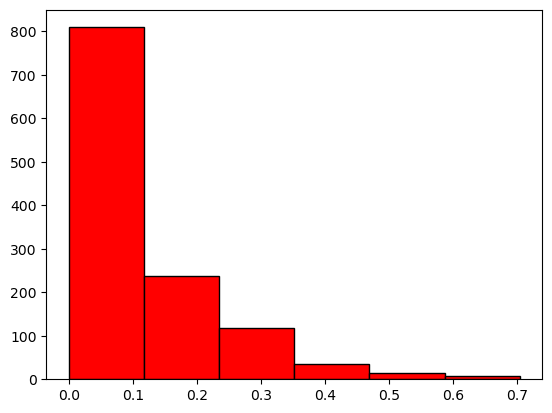

In [54]:
plt.hist(df_aapl['title_positive_sentiment'], bins=6, color='red', edgecolor='black')


Text(0.5, 1.0, 'Histogram of Positive Sentiment from Perigon')

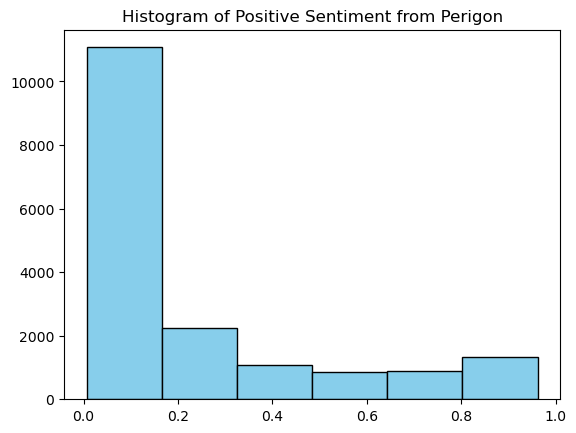

In [10]:
plt.hist(df['positive_sentiment'], bins=6, color='skyblue', edgecolor='black')
plt.title('Histogram of Positive Sentiment from Perigon')

Text(0.5, 1.0, 'Histogram of Negative Sentiment from Perigon')

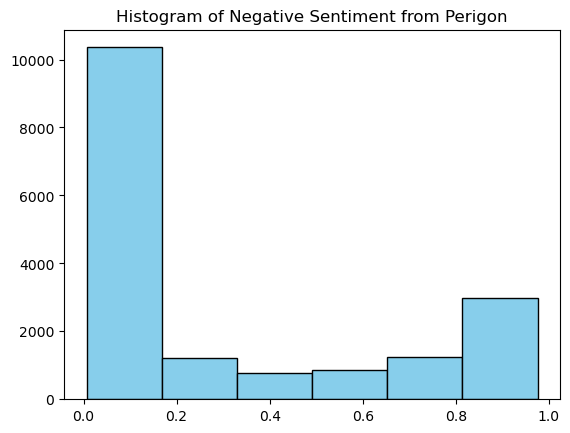

In [12]:
plt.hist(df['negative_sentiment'], bins=6, color='skyblue', edgecolor='black')
plt.title('Histogram of Negative Sentiment from Perigon')

Text(0.5, 1.0, 'Histogram of Neutral Sentiment from Perigon')

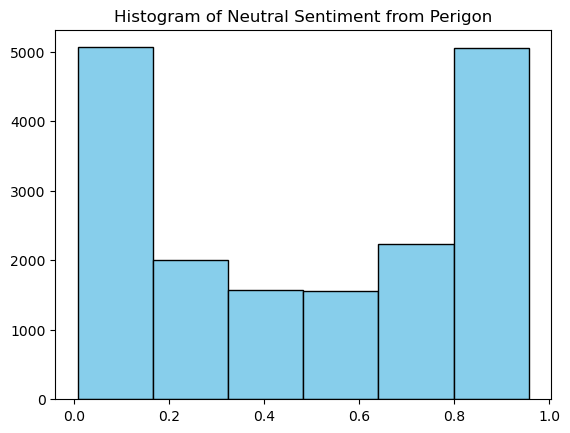

In [13]:
plt.hist(df['neutral_sentiment'], bins=6, color='skyblue', edgecolor='black')
plt.title('Histogram of Neutral Sentiment from Perigon')

Text(0.5, 1.0, 'Histogram of Title Polarity from TextBlob')

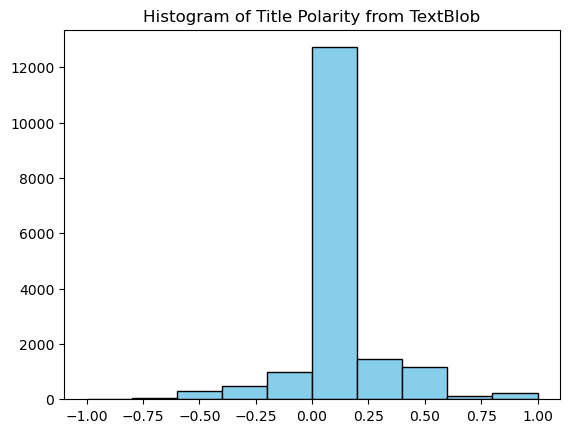

In [17]:
plt.hist(df['title_polarity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Title Polarity from TextBlob')
#consider taking the log of 'title_polarity'

Text(0.5, 1.0, 'Histogram of Title Subjectivity from TextBlob')

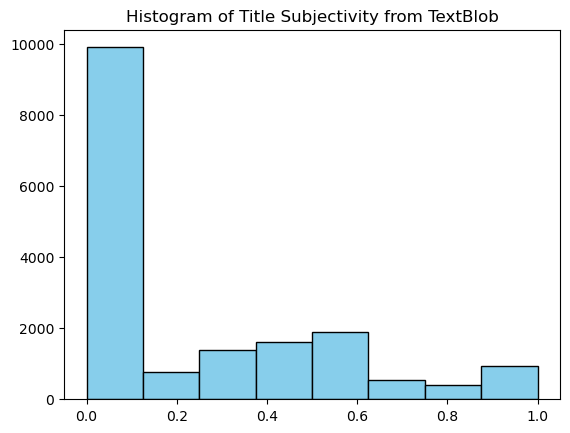

In [16]:
plt.hist(df['title_subjectivity'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Title Subjectivity from TextBlob')

(array([  5.,  22.,  34.,  61., 121., 232., 186., 562.]),
 array([0.256, 0.349, 0.442, 0.535, 0.628, 0.721, 0.814, 0.907, 1.   ]),
 <BarContainer object of 8 artists>)

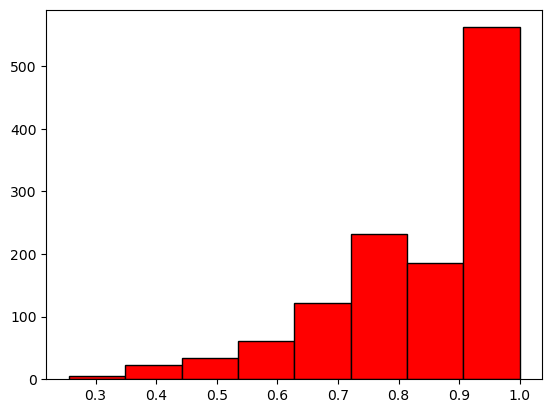

In [55]:
plt.hist(df_aapl['title_neutral_sentiment'], bins=8, color='red', edgecolor='black')

In [ ]:
#train test split

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder

In [5]:
#company number counter
wordcounts_lower = Counter(i.lower() for i in brown.words())

In [7]:
df.shape

(17471, 21)

In [12]:
df.dtypes

articleDate            object
n_companies             int64
StockSymbol            object
source                 object
companies              object
entities               object
positive_sentiment    float64
negative_sentiment    float64
neutral_sentiment     float64
title_polarity        float64
title_subjectivity    float64
open                  float64
close                 float64
high                  float64
low                   float64
volume_start          float64
volume_end            float64
volume_mean           float64
country_isUS            int64
open_marketcap        float64
close_marketcap       float64
dtype: object

In [8]:
#do we want to include day of week?
#a dummy variable for if number of companies exceeds a certain threshold?

,articleDate,n_companies,StockSymbol,source,companies,entities,positive_sentiment,negative_sentiment,neutral_sentiment,title_polarity,...,open,close,high,low,volume_start,volume_end,volume_mean,country_isUS,open_marketcap,close_marketcap
0,2022-01-03,2,AAPL,mixed-news.com,"[{'id': '806457af1fd9418db78388760f52c06f', 'n...","[{'data': 'Apple', 'type': 'ORG', 'mentions': ...",0.038229,0.064935,0.896836,0.000000,...,177.830002,172.169998,182.940002,171.029999,104487900.0,86709100.0,96389800.0,1,1.858108e+10,1.492871e+10
1,2022-01-03,1,AAPL,mixed-news.com,"[{'id': '5985872d662c4a3f941a9c581a9fce71', 'n...","[{'data': 'Apple', 'type': 'ORG', 'mentions': ...",0.048013,0.028628,0.923359,0.000000,...,177.830002,172.169998,182.940002,171.029999,104487900.0,86709100.0,96389800.0,1,1.858108e+10,1.492871e+10
2,2022-01-03,1,AAPL,ft.com,"[{'id': '5985872d662c4a3f941a9c581a9fce71', 'n...","[{'data': 'Apple', 'type': 'ORG', 'mentions': ...",0.548833,0.371926,0.079241,0.068182,...,177.830002,172.169998,182.940002,171.029999,104487900.0,86709100.0,96389800.0,0,1.858108e+10,1.492871e+10
3,2022-01-04,2,AAPL,ft.com,"[{'id': 'aff4495e1d3d40278d6bb5f9d2a3bd25', 'n...","[{'data': 'US', 'type': 'GPE', 'mentions': 4},...",0.050658,0.097955,0.851387,0.000000,...,177.830002,172.169998,182.940002,171.029999,104487900.0,86709100.0,96389800.0,0,1.858108e+10,1.492871e+10
4,2022-01-04,3,AAPL,ft.com,"[{'id': 'f1e3e2243cd142408136bd8f43282c4a', 'n...","[{'data': 'City', 'type': 'ORG', 'mentions': 2...",0.065301,0.769178,0.165521,0.250000,...,177.830002,172.169998,182.940002,171.029999,104487900.0,86709100.0,96389800.0,0,1.858108e+10,1.492871e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17466,2023-12-27,1,XOM,marketbeat.com,"[{'id': '52b581be4bea4c7ca107c0261d5d942e', 'n...","[{'data': 'Exxon Mobil Co.', 'type': 'ORG', 'm...",0.536791,0.039401,0.423808,0.000000,...,193.610001,192.529999,194.660004,191.089996,28919300.0,42628800.0,38421425.0,1,5.599066e+09,8.207323e+09
17467,2023-12-27,13,XOM,ii.co.uk,"[{'id': '4de51cf8472b4ce7a5aecdf52a1de4c0', 'n...","[{'data': 'US', 'type': 'GPE', 'mentions': 8},...",0.740931,0.040317,0.218752,0.000000,...,193.610001,192.529999,194.660004,191.089996,28919300.0,42628800.0,38421425.0,0,5.599066e+09,8.207323e+09
17468,2023-12-27,8,XOM,cyprus-mail.com,"[{'id': '2fc8215b27ff48ec9227ea6ae39c5054', 'n...","[{'data': 'U.S.', 'type': 'GPE', 'mentions': 8...",0.188013,0.415904,0.396084,0.000000,...,193.610001,192.529999,194.660004,191.089996,28919300.0,42628800.0,38421425.0,0,5.599066e+09,8.207323e+09
17469,2023-12-28,1,XOM,defenseworld.net,"[{'id': '52b581be4bea4c7ca107c0261d5d942e', 'n...","[{'data': 'Exeter Financial LLC', 'type': 'ORG...",0.484463,0.045062,0.470475,0.000000,...,193.610001,192.529999,194.660004,191.089996,28919300.0,42628800.0,38421425.0,1,5.599066e+09,8.207323e+09


In [19]:
df.isna().sum()

articleDate           0
n_companies           0
StockSymbol           0
source                0
companies             0
entities              0
positive_sentiment    0
negative_sentiment    0
neutral_sentiment     0
title_polarity        0
title_subjectivity    0
open                  0
close                 0
high                  0
low                   0
volume_start          0
volume_end            0
volume_mean           0
country_isUS          0
open_marketcap        0
close_marketcap       0
dtype: int64

In [9]:
df['StockSymbol'].value_counts()

StockSymbol
XOM      1858
MSFT     1192
GOOGL    1182
META     1173
AAPL     1160
JPM      1109
TSLA     1085
MA        973
AMZN      940
JNJ       940
LLY       937
V         935
PG        926
AVGO      924
UNH       923
NVDA      649
ABNB      565
Name: count, dtype: int64

In [11]:
df.isna().sum()

articleDate           0
n_companies           0
StockSymbol           0
source                0
companies             0
entities              0
positive_sentiment    0
negative_sentiment    0
neutral_sentiment     0
title_polarity        0
title_subjectivity    0
open                  0
close                 0
high                  0
low                   0
volume_start          0
volume_end            0
volume_mean           0
country_isUS          0
open_marketcap        0
close_marketcap       0
dtype: int64

In [16]:
df['n_companies'].value_counts()

n_companies
1     7197
2     3747
3     2010
4     1180
5      813
6      554
7      454
8      309
9      298
11     198
10     174
12     100
13      85
14      55
15      54
16      25
19      25
18      25
20      19
17      18
25      16
21      12
35      11
34       9
29       8
22       8
24       8
37       7
43       7
23       6
26       5
45       4
28       4
38       3
27       2
36       2
49       2
33       2
39       2
32       2
30       2
57       2
42       1
46       1
48       1
41       1
44       1
47       1
53       1
Name: count, dtype: int64

In [13]:
#define X and y
X = df[ ['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol'] ]
y = df[ ['close_marketcap', 'StockSymbol'] ]

In [45]:
def train_test_full(df):
    df_XOM = df [ df['StockSymbol'] == 'XOM' ]
    X_train_XOM, X_test_XOM, y_train_XOM, y_test_XOM = train_test_split(df[df['StockSymbol'] == 'XOM'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'XOM'][['close_marketcap',
                                                                                                               'StockSymbol']], test_size = .60)
    df_MSFT = df [ df['StockSymbol'] == 'MSFT' ]
    X_train_MSFT, X_test_MSFT, y_train_MSFT, y_test_MSFT = train_test_split(df[df['StockSymbol'] == 'MSFT'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'MSFT'][['close_marketcap',
                                                                                                               'StockSymbol']], test_size = .60)
    df_GOOGL = df [ df['StockSymbol'] == 'GOOGL' ]
    X_train_GOOGL, X_test_GOOGL, y_train_GOOGL, y_test_GOOGL = train_test_split(df[df['StockSymbol'] == 'GOOGL'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'GOOGL'][['close_marketcap',
                                                                                                               'StockSymbol']], test_size = .60)
    df_META = df [ df['StockSymbol'] == 'META' ]
    X_train_META, X_test_META, y_train_META, y_test_META = train_test_split(df[df['StockSymbol'] == 'META'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'META'][['close_marketcap',
                                                                                                             'StockSymbol']], test_size = .60)
           
    df_AAPL = df [ df['StockSymbol'] == 'AAPL' ]
    X_train_AAPL, X_test_AAPL, y_train_AAPL, y_test_AAPL = train_test_split(df[df['StockSymbol'] == 'AAPL'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'AAPL'][['close_marketcap',
                                                                                                             'StockSymbol']], test_size = .60)
         
    df_JPM = df [ df['StockSymbol'] == 'JPM' ]
    X_train_JPM, X_test_JPM, y_train_JPM, y_test_JPM = train_test_split(df[df['StockSymbol'] == 'JPM'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'JPM'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
    
    df_TSLA = df [ df['StockSymbol'] == 'TSLA' ]
    X_train_TSLA, X_test_TSLA, y_train_TSLA, y_test_TSLA = train_test_split(df[df['StockSymbol'] == 'TSLA'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'TSLA'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
    
    df_MA = df [ df['StockSymbol'] == 'MA' ]
    X_train_MA, X_test_MA, y_train_MA, y_test_MA = train_test_split(df[df['StockSymbol'] == 'MA'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'MA'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
    
                                                                                                            
    df_AMZN = df [ df['StockSymbol'] == 'AMZN' ]
    X_train_AMZN, X_test_AMZN, y_train_AMZN, y_test_AMZN = train_test_split(df[df['StockSymbol'] == 'AMZN'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'AMZN'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
    
    df_JNJ = df [ df['StockSymbol'] == 'JNJ' ]
    X_train_JNJ, X_test_JNJ, y_train_JNJ, y_test_JNJ = train_test_split(df[df['StockSymbol'] == 'JNJ'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'JNJ'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .40)
    
    df_LLY = df [ df['StockSymbol'] == 'LLY' ]
    X_train_LLY, X_test_LLY, y_train_LLY, y_test_LLY = train_test_split(df[df['StockSymbol'] == 'LLY'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'LLY'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .40)
    
    df_V = df [ df['StockSymbol'] == 'V' ]
    X_train_V, X_test_V, y_train_V, y_test_V = train_test_split(df[df['StockSymbol'] == 'V'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'V'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
  
    df_PG = df [ df['StockSymbol'] == 'PG' ]
    X_train_PG, X_test_PG, y_train_PG, y_test_PG = train_test_split(df[df['StockSymbol'] == 'PG'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'PG'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
  
    df_AVGO = df [ df['StockSymbol'] == 'AVGO' ]
    X_train_AVGO, X_test_AVGO, y_train_AVGO, y_test_AVGO = train_test_split(df[df['StockSymbol'] == 'AVGO'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'AVGO'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
  
    df_UNH = df [ df['StockSymbol'] == 'UNH' ]
    X_train_UNH, X_test_UNH, y_train_UNH, y_test_UNH = train_test_split(df[df['StockSymbol'] == 'UNH'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'UNH'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
  
    df_NVDA = df [ df['StockSymbol'] == 'NVDA' ]
    X_train_NVDA, X_test_NVDA, y_train_NVDA, y_test_NVDA = train_test_split(df[df['StockSymbol'] == 'NVDA'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'NVDA'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
  
    df_ABNB = df [ df['StockSymbol'] == 'ABNB' ]
    X_train_ABNB, X_test_ABNB, y_train_ABNB, y_test_ABNB = train_test_split(df[df['StockSymbol'] == 'ABNB'][['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
    'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol']],
                                                                            df[df['StockSymbol'] == 'ABNB'][['close_marketcap',
                                                                                                            'StockSymbol']], test_size = .60)
  
    
    X_train_joined = pd.concat([X_train_XOM, X_train_MSFT, X_train_GOOGL, X_train_META, X_train_AAPL, X_train_JPM, X_train_TSLA, X_train_MA, X_train_AMZN, X_train_JNJ, X_train_LLY, X_train_V, X_train_PG, X_train_AVGO, X_train_UNH, X_train_NVDA, X_train_ABNB],
                          ignore_index=True)
    X_test_joined =  pd.concat([X_test_XOM, X_test_MSFT, X_test_GOOGL, X_test_META, X_test_AAPL, X_test_JPM, X_test_TSLA, X_test_MA, X_test_AMZN, X_test_JNJ, X_test_LLY, X_test_V, X_test_PG, X_test_AVGO, X_test_UNH, X_test_NVDA, X_test_ABNB],
                          ignore_index=True)
    y_train_joined =  pd.concat([y_train_XOM, y_train_MSFT, y_train_GOOGL, y_train_META, y_train_AAPL, y_train_JPM, y_train_TSLA, y_train_MA, y_train_AMZN, y_train_JNJ, y_train_LLY, y_train_V, y_train_PG, y_train_AVGO, y_train_UNH, y_train_NVDA, y_train_ABNB],
                          ignore_index=True)
    y_test_joined = pd.concat([y_test_XOM, y_test_MSFT, y_test_GOOGL, y_test_META, y_test_AAPL, y_test_JPM, y_test_TSLA, y_test_MA, y_test_AMZN, y_test_JNJ, y_test_LLY, y_test_V, y_test_PG, y_test_AVGO, y_test_UNH, y_test_NVDA, y_test_ABNB],
                          ignore_index=True)
    return X_train_joined, X_test_joined,  y_train_joined, y_test_joined

In [46]:
X_train_joined, X_test_joined,  y_train_joined, y_test_joined = train_test_full(df)

In [47]:
X_train_joined.shape

(7359, 13)

In [48]:
X_train_joined.isna().sum()

country_isUS          0
articleDate           0
n_companies           0
source                0
positive_sentiment    0
negative_sentiment    0
neutral_sentiment     0
title_polarity        0
title_subjectivity    0
open_marketcap        0
high                  0
low                   0
StockSymbol           0
dtype: int64

In [49]:
X_test_joined.shape

(10112, 13)

In [50]:
X_test_joined.isna().sum()

country_isUS          0
articleDate           0
n_companies           0
source                0
positive_sentiment    0
negative_sentiment    0
neutral_sentiment     0
title_polarity        0
title_subjectivity    0
open_marketcap        0
high                  0
low                   0
StockSymbol           0
dtype: int64

In [51]:
y_train_joined.shape

(7359, 2)

In [52]:
y_test_joined.shape

(10112, 2)

In [53]:
y_train_joined.isna().sum()

close_marketcap    0
StockSymbol        0
dtype: int64

In [55]:
y_test_joined.isna().sum()

close_marketcap    0
StockSymbol        0
dtype: int64

In [ ]:
y_train.drop(columns=['StockSymbol']) 

In [97]:
X = df[ ['country_isUS', 'articleDate', 'n_companies', 'source', 'positive_sentiment', 'negative_sentiment',
'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'open_marketcap', 'high', 'low', 'StockSymbol'] ]
y = df[ ['close_marketcap', 'StockSymbol'] ]




In [92]:
#create a subset of the data based off a ticker input

#full splitter

def selectStockX(X):
    stock = input("Input the Stock Ticker of the company you would like to predict.")
    X_test_subset = X_test[X_test['StockSymbol'] == stock]
    return X_test_subset  #is this necessary?

def selectStockY(y):
    stock = input("Input the Stock Ticker of the company you would like to predict.")
    y_test_subset = y_test[y_test['StockSymbol'] == stock]
    return y_test_subset

In [60]:
X_test_subset = selectStockX(df)

Input the Stock Ticker of the company you would like to predict. MSFT


In [62]:
y_test_subset = selectStockY(df)

Input the Stock Ticker of the company you would like to predict. MSFT


In [63]:
X_test_subset.shape

(528, 13)

In [64]:
y_test_subset.shape

(528, 2)

In [ ]:
def stock_picker(X_train_joined, X_train_joined, y_test_joined, X_train_joined):
    stock_input = input("Enter the Stock Symbol of the company you would like to predict: ")
        if stock_input not in stock_list:
            while stock_input not in stock_list:
                print("You have entered stock symbol that is not recognized by our model.")
                stock_input = input("Please enter the Stock Symbol of the company you would like to predict: ")
    X_test_stockinput = X_test_joined[  X_test_joined['StockSymbol'] == stock_input ]
    X_train_stockinput = X_train_joined[ X_train_joined['StockSymbol'] == stock_input ]
    y_test_stockinput = y_test_joined[ y_test_joined['StockSymbol'] == stock_input ]
    X_train_stockinput = X_train_joined[ X_train_joined['StockSymbol'] == stock_input ]
    #y_train = y_train.drop(columns=['StockSymbol']) 
    #y_test = y_train.drop(columns=['StockSymbol']) 
    

In [65]:
X_test_subset = X_test_subset.drop(columns=['StockSymbol'])
y_test_subset = y_test_subset.drop(columns=['StockSymbol']) 
#put the above two lines in the selectStock functions



In [72]:
X_train = X_train.drop(columns=['StockSymbol'])
y_train = y_train.drop(columns=['StockSymbol']) 

In [66]:
y_train

,close_marketcap,StockSymbol
11055,19485952712,NVDA
10637,11679930154,MSFT
4828,23848202850,JNJ
9406,10663817094,META
11665,5212864770,PG
...,...,...
11810,8675629891,PG
10749,14090257118,MSFT
6380,9915032285,JPM
15731,15336413000,XOM


In [44]:
y_test.isna().sum()

close_marketcap    0
StockSymbol        0
dtype: int64

In [84]:
lstNum = ['open_marketcap', 'high', 'low', 'positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'title_polarity', 'title_subjectivity', 'n_companies']    
lstCat = ['articleDate','source', 'country_isUS']

pipeNum = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', lstNum) ] )),
    ('scaler', StandardScaler()) ])

pipeCat = Pipeline([
('selector', ColumnTransformer([ ('selector', 'passthrough', lstCat ) ] )),
('encoder', OneHotEncoder( dtype=int, drop='first', sparse_output = False ) ) ])

preprocessor = FeatureUnion([('cat', pipeCat), ('num', pipeNum)])

pipeGbr1 = Pipeline([
    ('preprocessor', preprocessor ), ('gradient', GradientBoostingRegressor())
], verbose=True )
pipeGbr1

Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['articleDate',
                                                                                                    'source',
                                                                                                    'country_isUS'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['open_marketcap',
                                                                                                    'high',
                                                                                                    'low',
                                                                                                    'positive_sentiment',
                                                                                                    'negative_sentiment',
                                                                                                    'neutral_sentiment',
                                                                                                    'title_polarity',
                                                                                                    'title_subjectivity',
                                                                                                    'n_companies'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('gradient', GradientBoostingRegressor())],
         verbose=True)